In [64]:
from sklearn import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


In [31]:
# A.3
iris_dataset = datasets.load_iris()

In [32]:
# A.4 print them all
print(f'Number fo data: %s' % len(iris_dataset.data))
print(f'Names of variables: %s' % iris_dataset.feature_names)
print(f'Names of classes: %s' % iris_dataset.target_names)


Number fo data: 150
Names of variables: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Names of classes: ['setosa' 'versicolor' 'virginica']


In [33]:
# A.5
names_of_classes = iris_dataset.target_names
for data, target in zip(iris_dataset.data, iris_dataset.target):
    print(f'Object %s ===> Class %s' % (data, names_of_classes[target]))

Object [5.1 3.5 1.4 0.2] ===> Class setosa
Object [4.9 3.  1.4 0.2] ===> Class setosa
Object [4.7 3.2 1.3 0.2] ===> Class setosa
Object [4.6 3.1 1.5 0.2] ===> Class setosa
Object [5.  3.6 1.4 0.2] ===> Class setosa
Object [5.4 3.9 1.7 0.4] ===> Class setosa
Object [4.6 3.4 1.4 0.3] ===> Class setosa
Object [5.  3.4 1.5 0.2] ===> Class setosa
Object [4.4 2.9 1.4 0.2] ===> Class setosa
Object [4.9 3.1 1.5 0.1] ===> Class setosa
Object [5.4 3.7 1.5 0.2] ===> Class setosa
Object [4.8 3.4 1.6 0.2] ===> Class setosa
Object [4.8 3.  1.4 0.1] ===> Class setosa
Object [4.3 3.  1.1 0.1] ===> Class setosa
Object [5.8 4.  1.2 0.2] ===> Class setosa
Object [5.7 4.4 1.5 0.4] ===> Class setosa
Object [5.4 3.9 1.3 0.4] ===> Class setosa
Object [5.1 3.5 1.4 0.3] ===> Class setosa
Object [5.7 3.8 1.7 0.3] ===> Class setosa
Object [5.1 3.8 1.5 0.3] ===> Class setosa
Object [5.4 3.4 1.7 0.2] ===> Class setosa
Object [5.1 3.7 1.5 0.4] ===> Class setosa
Object [4.6 3.6 1.  0.2] ===> Class setosa
Object [5.1

In [34]:
# B.1
X = np.asarray([[1, -1,  2],
              [2,   0,  0],
              [0,   1, -1]])
#  B.2
print(f'matrix: %s' % X)
print(f'mean: %s' % X.mean())
print(f'variance: %s' % X.var())


matrix: [[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]
mean: 0.4444444444444444
variance: 1.1358024691358024


In [35]:
# B.3
X = preprocessing.scale(X)
# WELL, it changed variables to values closer to -1, 0 and 1 instead of 2, this should improve performance of future computations

In [36]:
# B.4
print('NEW')
print(f'matrix: %s' % X)
print(f'mean: %s' % X.mean())
print(f'variance: %s' % X.var())
# Conlsucion: they changed. Mean is now very low, closer to 0 instead of being closer to 0.5
# Variance didn't change much, well, no real improvement.

NEW
matrix: [[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
mean: 4.9343245538895844e-17
variance: 1.0


In [37]:
# C.1
X2 = np.asarray([[1, -1,  2],
                 [2,  0,  0],
                 [0,  1, -1]])
# C.2
print(f'Mean of vars X2: %s' % X2.mean())

Mean of vars X2: 0.4444444444444444


In [38]:
# C.3
scaler = preprocessing.MinMaxScaler()
transformed_data = scaler.fit_transform(X2)
print('Transformed')
print(f'matrix: %s' % transformed_data)
print(f'mean: %s' % transformed_data.mean())
print(f'variance: %s' % transformed_data.var())
# Although mean returned to previous values (and we don't really care about it because it is all about the values from the matrix)
# the variance became a lot smaller and this means smaller noise, which is a lot more significant


Transformed
matrix: [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
mean: 0.48148148148148145
variance: 0.16941015089163236


0 : setosa
1 : versicolor
2 : virginica


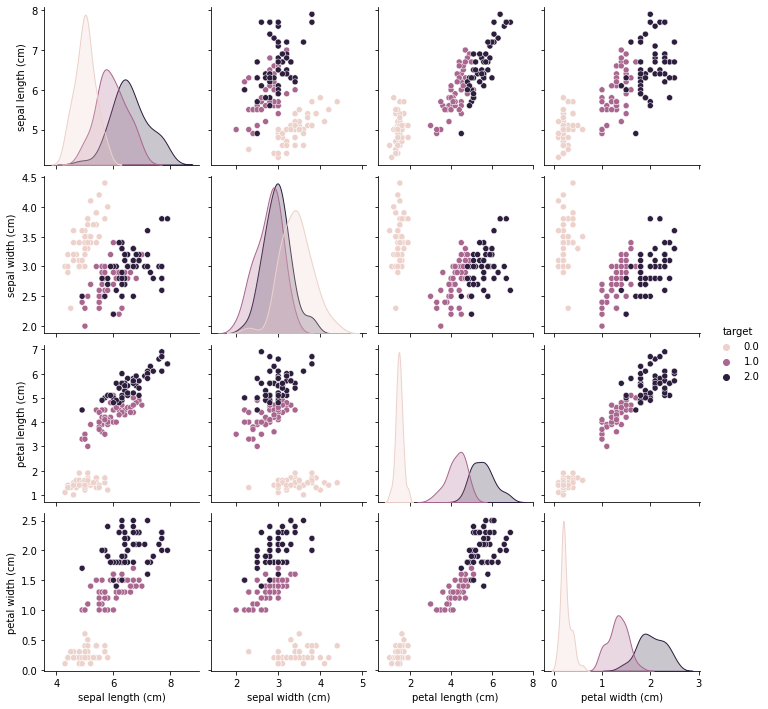

In [39]:
# D.2
# make it a pandas dataframe object
pd_iris_data = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])
for n in range(3):
    print(f'%i : %s' % (n, names_of_classes[n]))
sb.pairplot(pd_iris_data, hue='target')

# Better combinations are: petal length x width
#                          petal length and width are proportional, they should be round then in general for all flowers
#                          all these flowers have similar petals
# 
#                          sepal length x petal length
#                          the bigger the flower is, the bigger are both of its parts. 
# 
#                          Also, it is worth mentioning that even if flowers' proportions are similar, they are of different size. 
#                          Smallest are setosa, then comes versicolor and then virginica.


In [40]:
for n in pd_iris_data.columns:
    print(n)

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)
target


<AxesSubplot:>

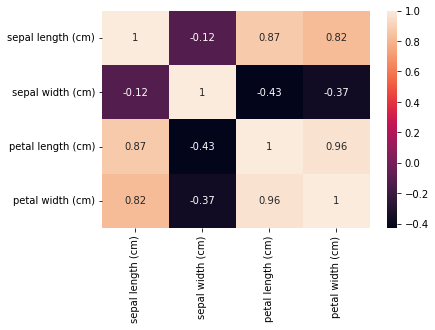

In [41]:
# D.3
sb.heatmap(pd_iris_data.drop(['target'], axis= 1).corr(), annot = True)
# Yes, indeed correlations between [sepal length x petal length] and [petal length x petal width]
# Also, I didn't quite notice connection between petal width and sepal length, I also suspect this is due to flower's proportions.
# But to be fair, this is quite badly showed on pairplot
# Note: I decided to use heatmap instead of coercoef, it is essentially the same thing but with VISUALS :)

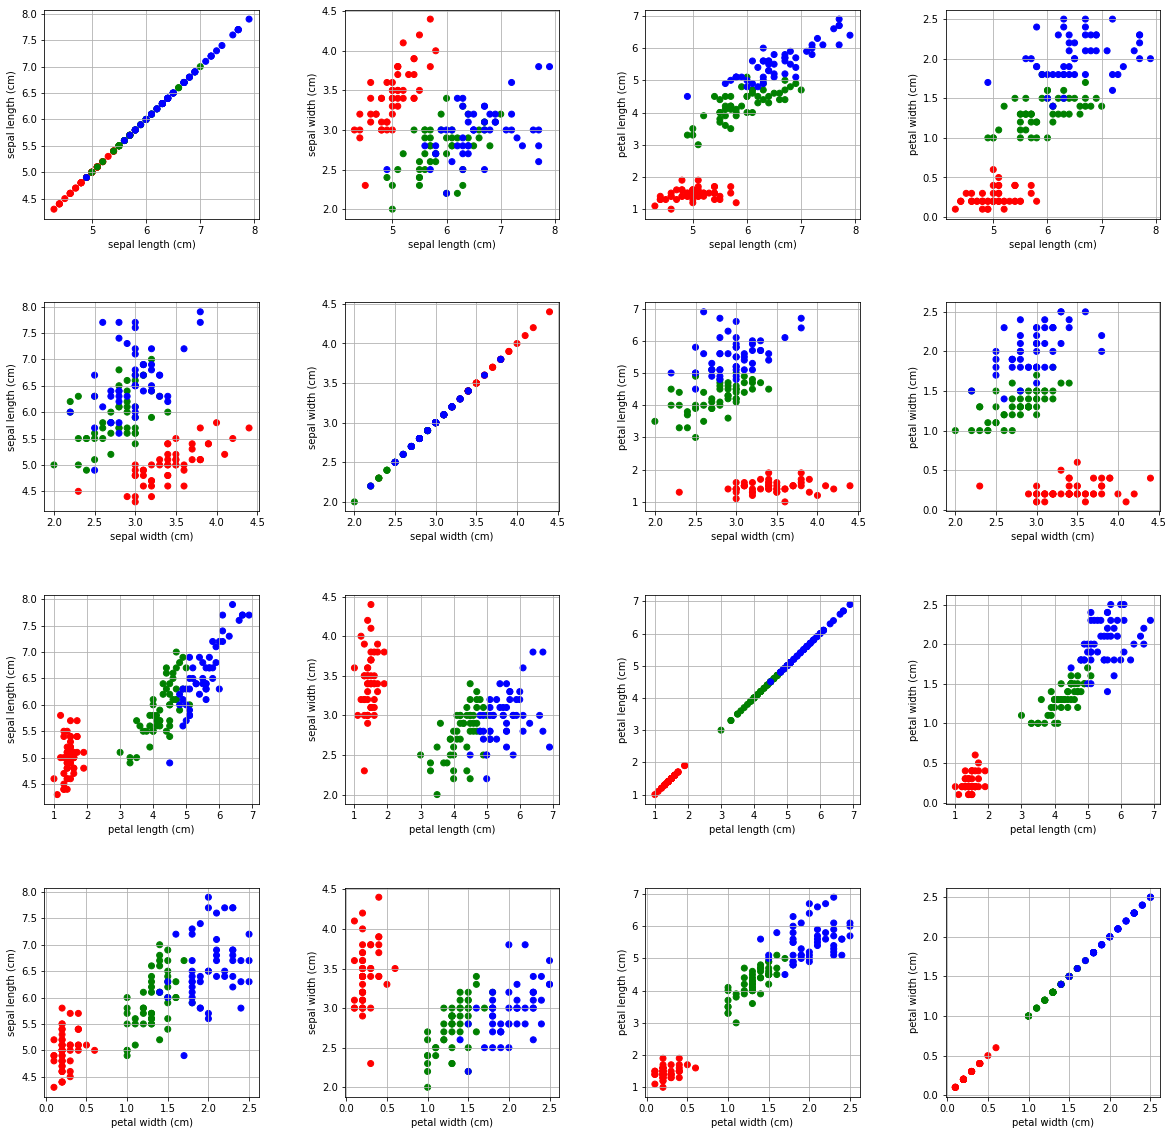

In [42]:
# D.4
fig = plt.figure("Setosa, Versicolor, Virginica", figsize=(20, 20))
index = 1
ccolors = ['red', 'green', 'blue']
colors = [ccolors[int(i)] for i in pd_iris_data.target]
for first_label in iris_dataset.feature_names:
    for second_label in iris_dataset.feature_names:
        ax = plt.subplot(4, 4, index, xlabel=first_label, ylabel=second_label)
        ax.scatter(pd_iris_data[first_label], pd_iris_data[second_label], color=colors)
        ax.grid(True)
        index += 1

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


In [43]:
# E.3
x_columns = pd_iris_data.columns.drop(['target'])
y_columns = ['target']
pca_fit_3 = PCA(n_components=3)
pca_fitted_iris_dataset_3 = pd.DataFrame(pca_fit_3.fit_transform(pd_iris_data[x_columns]))
pca_fitted_iris_dataset_3['target'] = pd_iris_data['target']

pca_fit_2 = PCA(n_components=2)
pca_fitted_iris_dataset_2 = pd.DataFrame(pca_fit_2.fit_transform(pd_iris_data[x_columns]))
pca_fitted_iris_dataset_2['target'] = pd_iris_data['target']
print(pca_fitted_iris_dataset_2.head(5))

lda_fit_2 = LDA(n_components=2)
lda_fitted_iris_dataset = pd.DataFrame(lda_fit_2.fit_transform(pd_iris_data[x_columns], pd_iris_data['target']))
lda_fitted_iris_dataset['target'] = pd_iris_data['target']
print(lda_fitted_iris_dataset.head(5))

          0         1  target
0 -2.684126  0.319397     0.0
1 -2.714142 -0.177001     0.0
2 -2.888991 -0.144949     0.0
3 -2.745343 -0.318299     0.0
4 -2.728717  0.326755     0.0
          0         1  target
0  8.061800  0.300421     0.0
1  7.128688 -0.786660     0.0
2  7.489828 -0.265384     0.0
3  6.813201 -0.670631     0.0
4  8.132309  0.514463     0.0


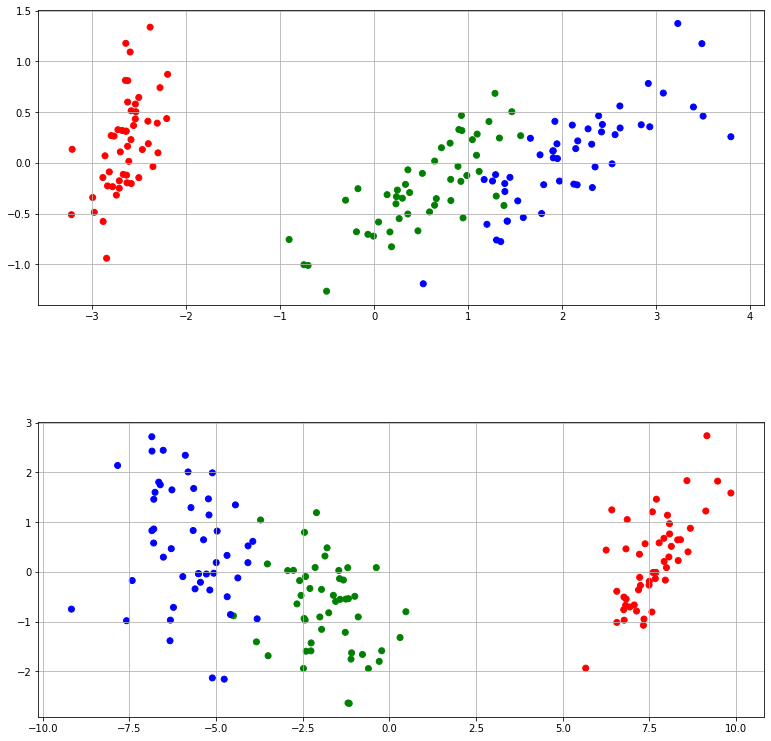

In [44]:
# E.4
fig = plt.figure("PCA vs LDA", figsize=(13, 13))
index = 1
list = [pca_fitted_iris_dataset_2, lda_fitted_iris_dataset]
ccolors = ['red', 'green', 'blue']
colors = [ccolors[int(i)] for i in pd_iris_data.target]

for data_list in range(2):
    ax = plt.subplot(2, 1, index)
    ax.scatter(list[data_list][0], list[data_list][1], color = colors)
    ax.grid(True)
    index += 1

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()
# TODO: add logical explanation

In [45]:
# E.5 Make same reduction with other reduction algorithm
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, random_state=0))
nca.fit(pd_iris_data[x_columns], pd_iris_data['target'])
knn = KNeighborsClassifier(n_neighbors=2)
knn_fitted_iris_dataset = knn.fit(nca.transform(pd_iris_data[x_columns]), pd_iris_data['target'])\

knn_iris = pd.DataFrame(nca.transform(pd_iris_data[x_columns]))
knn_iris['target'] = pd_iris_data['target']


# for reference
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html

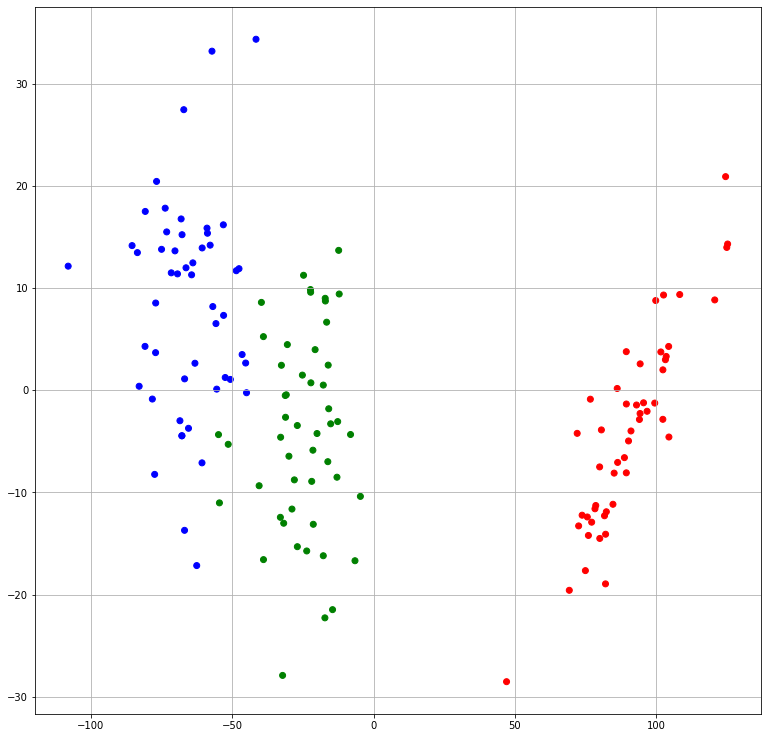

In [46]:
fig = plt.figure("KNN", figsize=(13, 13))

ax = plt.subplot(1, 1, 1)
ax.scatter(knn_iris[0], knn_iris[1], color = colors)
ax.grid(True)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [47]:
# F MNIST

(train_X, train_y), (test_X, test_y) = mnist.load_data()

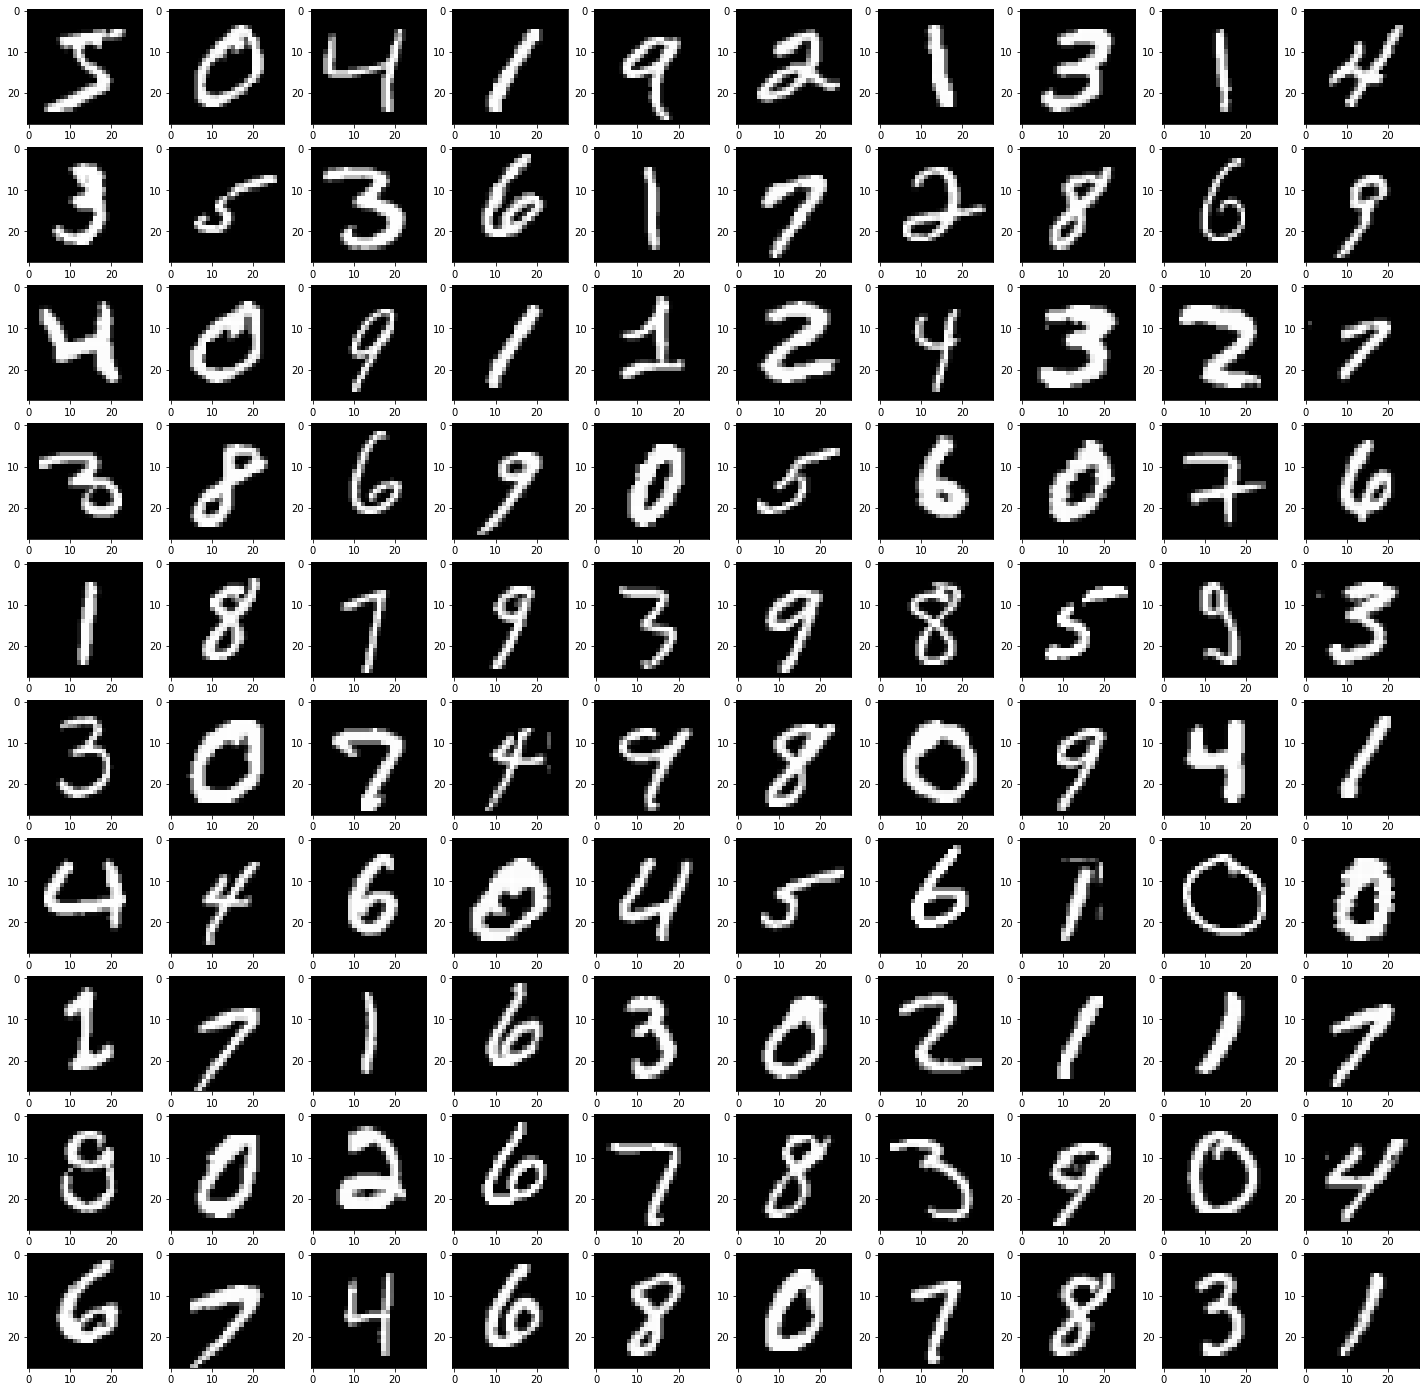

In [49]:
plt.figure(figsize=(25, 25))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))

plt.show()
# I will not render more images. Don't ask me to.

In [59]:
# Number of data:
print(f'Nr. of Data: %s' % len(train_X))
# Number of variables
print(f'Nr. of classes: %s' % len(np.unique(train_y)))
# print('There are ' + str(len(np.unique(train_y))) + " data classes represented by values " + str(np.unique(train_y)))
print(f'Classes are: %s')

Nr. of Data: 60000
Nr. of classes: 10


In [61]:
# MNIST example
num_pixels = train_X.shape[1] * train_X.shape[2]
train_X = train_X.reshape((train_X.shape[0], num_pixels)).astype('float32')
test_X = test_X.reshape((test_X.shape[0], num_pixels)).astype('float32')


In [67]:
# normalize inputs from 0-255 to 0-1
train_X = train_X / 255
test_X = test_X / 255


# one hot encode outputs
train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y)
num_classes = test_y.shape[1]

In [68]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [69]:
# build the model
model = baseline_model()
# Fit the model
model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(test_X, test_y, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 3s - loss: 1.5189 - accuracy: 0.6478 - val_loss: 0.7992 - val_accuracy: 0.8155 - 3s/epoch - 9ms/step
Epoch 2/10
300/300 - 2s - loss: 0.6085 - accuracy: 0.8524 - val_loss: 0.4704 - val_accuracy: 0.8817 - 2s/epoch - 7ms/step
Epoch 3/10
300/300 - 2s - loss: 0.4290 - accuracy: 0.8859 - val_loss: 0.3779 - val_accuracy: 0.8988 - 2s/epoch - 7ms/step
Epoch 4/10
300/300 - 2s - loss: 0.3651 - accuracy: 0.8989 - val_loss: 0.3350 - val_accuracy: 0.9055 - 2s/epoch - 7ms/step
Epoch 5/10
300/300 - 2s - loss: 0.3327 - accuracy: 0.9054 - val_loss: 0.3089 - val_accuracy: 0.9124 - 2s/epoch - 7ms/step
Epoch 6/10
300/300 - 2s - loss: 0.3111 - accuracy: 0.9111 - val_loss: 0.2932 - val_accuracy: 0.9160 - 2s/epoch - 7ms/step
Epoch 7/10
300/300 - 2s - loss: 0.2960 - accuracy: 0.9149 - val_loss: 0.2828 - val_accuracy: 0.9165 - 2s/epoch - 7ms/step
Epoch 8/10
300/300 - 2s - loss: 0.2833 - accuracy: 0.9188 - val_loss: 0.2736 - val_accuracy: 0.9210 - 2s/epoch - 7ms/step
Epoch 9/10
300/300 - 2s 